# Pytorch Modules

The PyTorch library modules are essential to create and train neural networks. The three main library modules are Autograd, Optim, and nn.

1.  Autograd Module: The autograd provides the functionality of easy calculation of gradients without the explicitly manual implementation of forward and backward pass for all layers. 



For training any neural network we perform backpropagation to calculate the gradient. By calling the .backward() function we can calculate every gradient from the root to the leaf. 

In [4]:
# importing torch
import torch
 
# creating a tensor
t1=torch.tensor(1.0, requires_grad = True)
t2=torch.tensor(2.0, requires_grad = True)
 
# creating a variable and gradient
z=100 * t1 * t2
z.backward()
 
# printing gradient
print("dz/dt1 : ", t1.grad.data)
print("dz/dt2 : ", t2.grad.data)

dz/dt1 :  tensor(200.)
dz/dt2 :  tensor(100.)


In [5]:
# importing torch
import torch
 
# creating a tensor
t1=torch.tensor(1.0)
t2=torch.tensor(2.0)
 
# creating a variable and gradient
z=100 * t1 * t2
z.backward()
 
# printing gradient
print("dz/dt1 : ", t1.grad.data)
print("dz/dt2 : ", t2.grad.data)

RuntimeError: element 0 of tensors does not require grad and does not have a grad_fn

2. Optim Module: PyTorch Optium Module which helps in the implementation of various optimization algorithms. This package contains the most commonly used algorithms like Adam, SGD, and RMS-Prop. To use torch.optim we first need to construct an Optimizer object which will keep the parameters and update it accordingly. First, we define the Optimizer by providing the optimizer algorithm we want to use. 

In [ ]:
optimizer = torch.optim.Adam(model.parameters(), lr=0.01) #defining optimizer


We set the gradients to zero before backpropagation. 

In [ ]:
optimizer.zero_grad() #setting gradients to zero

In PyTorch, during the training phase, we typically want to explicitly set the gradients to zero before starting to do backpropragation (i.e., updating the Weights and biases) because PyTorch accumulates the gradients on subsequent backward passes. 
When you start your training loop, ideally you should zero out the gradients so that you do the parameter update correctly. Otherwise, the gradient would be a combination of the old gradient, which you have already used to update your model parameters, and the newly-computed gradient. It would therefore point in some other direction than the intended direction towards the minimum (or maximum, in case of maximization objectives).

In [ ]:
optimizer.step() #parameter updation

Perform a single optimization step (parameter update) and return a loss.

3. nn Module: This package helps in the construction of neural networks. It is used to build layers. 

In [6]:
import torch
import torch.nn as nn

x = torch.tensor([[1.0, -1.0],
                  [0.0,  1.0],
                  [0.0,  0.0]])

in_features = x.shape[1]  # = 2
print(x.shape)
out_features = 2

m = nn.Linear(in_features, out_features)

torch.Size([3, 2])


where x contains three inputs (i.e. the batch size is 3), x[0], x[1] and x[3], each of size 2, and the output is going to be of shape (batch size, out_features) = (3, 2)

In [7]:
print(m.weight)

Parameter containing:
tensor([[-0.0041, -0.5727],
        [-0.0278,  0.2599]], requires_grad=True)


In [8]:
print(m.bias)

Parameter containing:
tensor([-0.2253,  0.6359], requires_grad=True)


In [9]:
y = m(x)
print(y)

tensor([[ 0.3433,  0.3481],
        [-0.7981,  0.8958],
        [-0.2253,  0.6359]], grad_fn=<AddmmBackward0>)


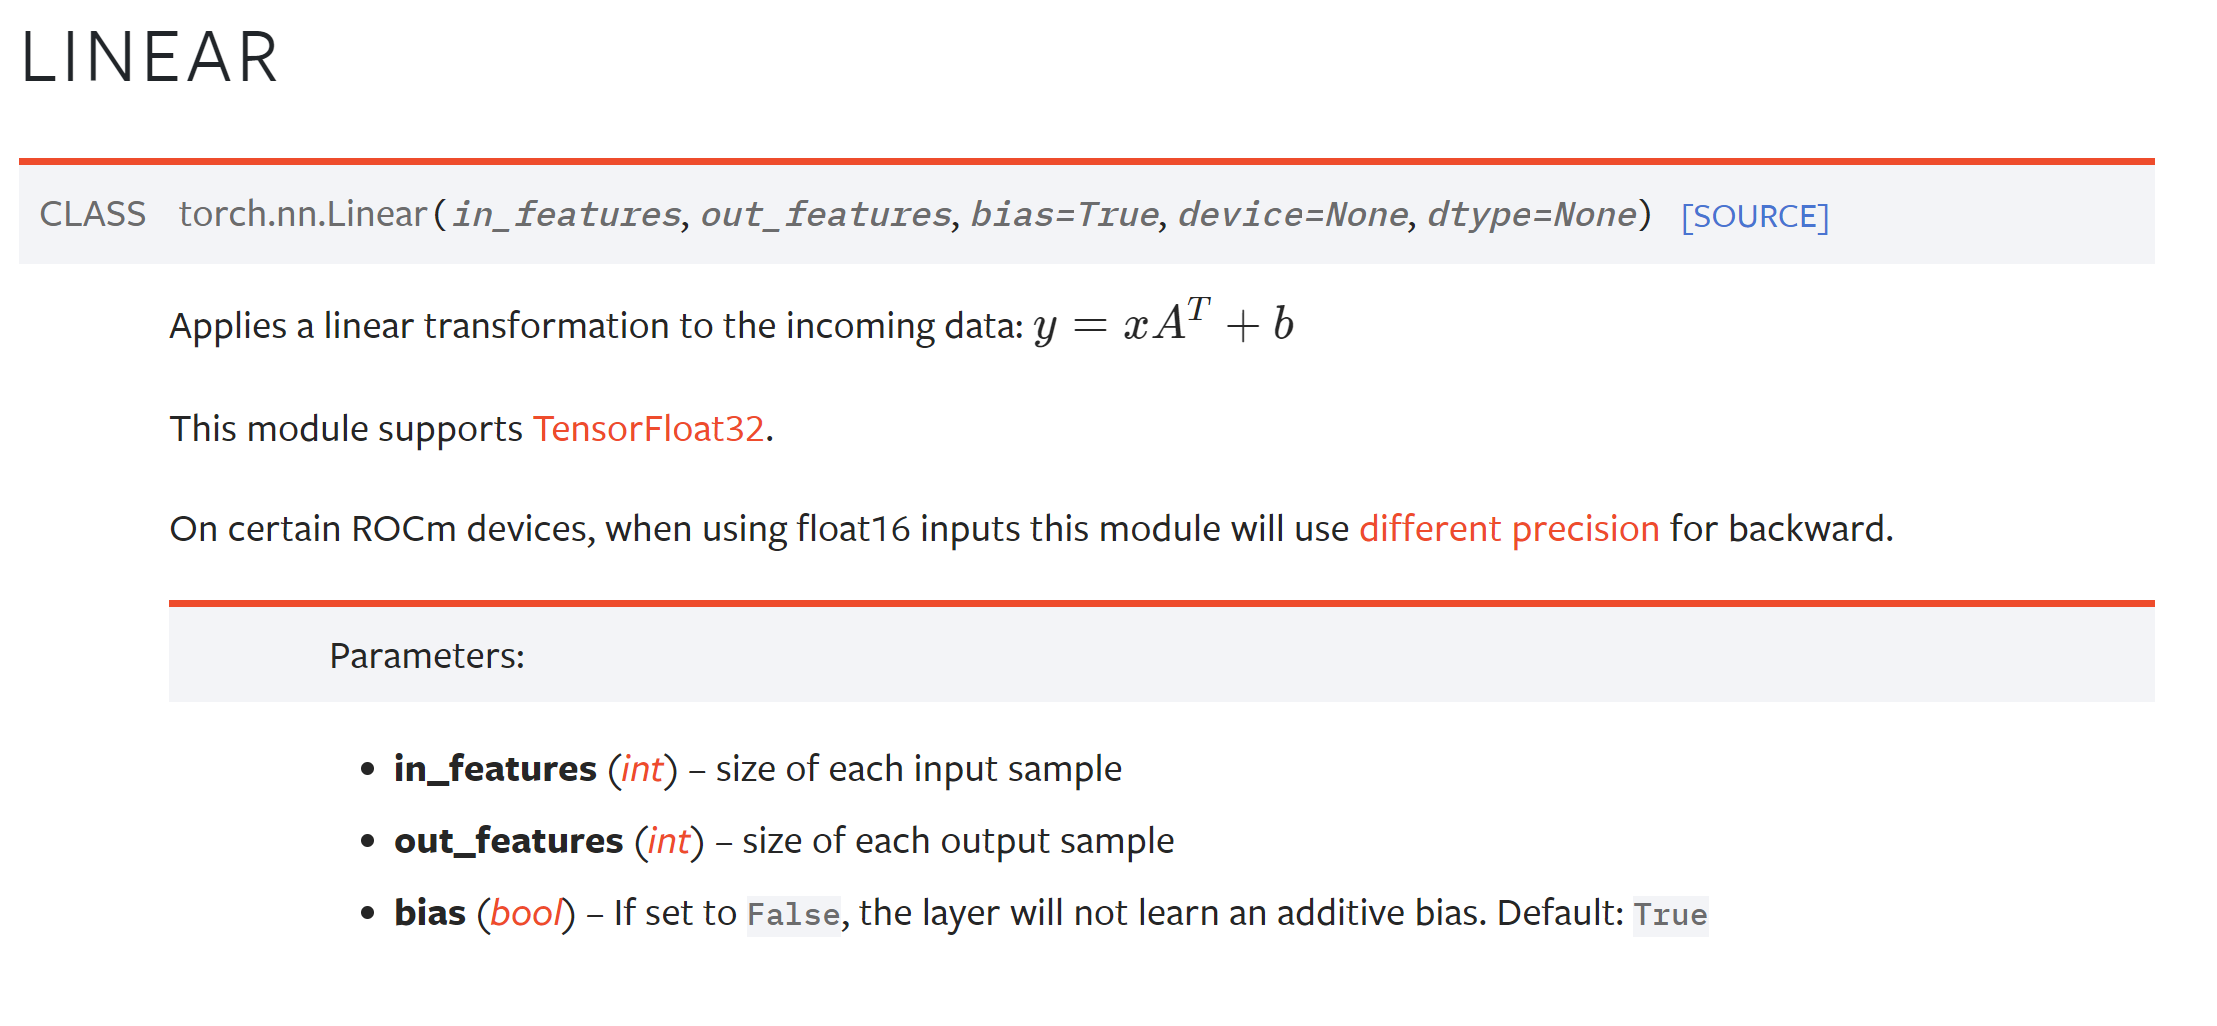

and (behind the scenes) it is computed as:

In [10]:
y1 = x.matmul(m.weight.t()) + m.bias  # y = x*W^T + b
print(y1)

tensor([[ 0.3433,  0.3481],
        [-0.7981,  0.8958],
        [-0.2253,  0.6359]], grad_fn=<AddBackward0>)


In [11]:
input_image = torch.rand(3,28,28)
print(input_image.size())

torch.Size([3, 28, 28])


We initialize the nn.Flatten layer to convert each 2D 28x28 image into a contiguous array of 784 pixel values ( the minibatch dimension (at dim=0) is maintained).

In [12]:
flatten = nn.Flatten()
flat_image = flatten(input_image)
print(flat_image.size())

torch.Size([3, 784])


In [13]:
layer1 = nn.Linear(in_features=28*28, out_features=20)
hidden1 = layer1(flat_image)
print(hidden1.size())

torch.Size([3, 20])


Non-linear activations are what create the complex mappings between the model’s inputs and outputs. They are applied after linear transformations to introduce nonlinearity, helping neural networks learn a wide variety of phenomena.

In this model, we use nn.ReLU between our linear layers, but there’s other activations to introduce non-linearity in your model.

In [14]:
print(f"Before ReLU: {hidden1}\n\n")
hidden1 = nn.ReLU()(hidden1)
print(f"After ReLU: {hidden1}")

Before ReLU: tensor([[-7.8067e-01,  6.0286e-01, -5.1514e-02, -1.1227e-01,  8.7808e-04,
         -2.5080e-01, -1.1907e+00,  9.3998e-02, -1.0793e-01, -6.1329e-02,
         -4.6758e-01,  6.9950e-02, -3.9026e-01, -1.3560e-01,  7.3209e-01,
          2.5044e-01,  3.9711e-01,  2.7210e-01, -4.2735e-01,  5.5517e-01],
        [-7.7330e-01,  4.7187e-01,  5.9222e-02, -7.5031e-02, -6.0092e-02,
          8.7337e-02, -7.1728e-01,  4.0828e-01, -2.5846e-01, -2.1598e-01,
         -1.1536e-01, -7.8262e-02, -2.4255e-01,  6.6601e-02,  5.4233e-01,
          1.7080e-01,  2.2819e-01,  9.2277e-02, -1.6299e-01,  6.7073e-01],
        [-6.0633e-01,  4.4563e-01,  6.5039e-02, -4.0041e-01, -1.2668e-01,
         -2.2771e-01, -1.0343e+00,  4.1351e-01, -6.6911e-02,  1.7446e-02,
          6.9449e-03,  2.1127e-02, -8.8682e-02, -5.1037e-02,  5.5347e-01,
          1.1739e-02,  4.4042e-02,  3.5450e-01, -3.1293e-01,  4.1406e-01]],
       grad_fn=<AddmmBackward0>)


After ReLU: tensor([[0.0000, 0.6029, 0.0000, 0.0000, 0.0009,

nn.Sequential is an ordered container of modules. The data is passed through all the modules in the same order as defined. You can use sequential containers to put together a quick network like seq_modules.

In [15]:
seq_modules = nn.Sequential(
    flatten,
    layer1,
    nn.ReLU(),
    nn.Linear(20, 10)
)
input_image = torch.rand(3,28,28)
logits = seq_modules(input_image)

The last linear layer of the neural network returns logits - raw values in [-infty, infty] - which are passed to the nn.Softmax module. The logits are scaled to values [0, 1] representing the model’s predicted probabilities for each class. dim parameter indicates the dimension along which the values must sum to 1.


In [16]:
softmax = nn.Softmax(dim=1)
pred_probab = softmax(logits)